In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import io
from dotenv import dotenv_values, load_dotenv

In [2]:
# Load credentials from .env file
load_dotenv()  
USERNAME, PASSWORD = dotenv_values().values()

# Set base path for API calls
BASE_URL = 'https://www-genesis.destatis.de/genesisWS/rest/2020/'

In [3]:
response = requests.get(BASE_URL + 'data/tablefile', params={
    'username': USERNAME,
    'password': PASSWORD,
    'name': '61111-0001',
    'startyear': 1998,
    'format': 'ffcsv',
    'language': 'de'
})
print(response.text[0:150])

Statistik_Code;Statistik_Label;Zeit_Code;Zeit_Label;Zeit;1_Merkmal_Code;1_Merkmal_Label;1_Auspraegung_Code;1_Auspraegung_Label;PREIS1__Verbraucherprei


In [4]:
# Set encoding to unicode (utf-8)
response.encoding = 'utf-8'
csvInput = io.StringIO(response.text)

In [5]:
df = pd.read_csv(csvInput, delimiter=';', decimal=",", na_values=["...",".","-","/","x"])

In [6]:
df.head(5)

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,PREIS1__Verbraucherpreisindex__2020=100,PREIS1__CH0004
0,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1998,DINSG,Deutschland insgesamt,DG,Deutschland,74.0,0.8
1,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1999,DINSG,Deutschland insgesamt,DG,Deutschland,74.5,0.7
2,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2000,DINSG,Deutschland insgesamt,DG,Deutschland,75.5,1.3
3,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2001,DINSG,Deutschland insgesamt,DG,Deutschland,77.0,2.0
4,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2002,DINSG,Deutschland insgesamt,DG,Deutschland,78.1,1.4


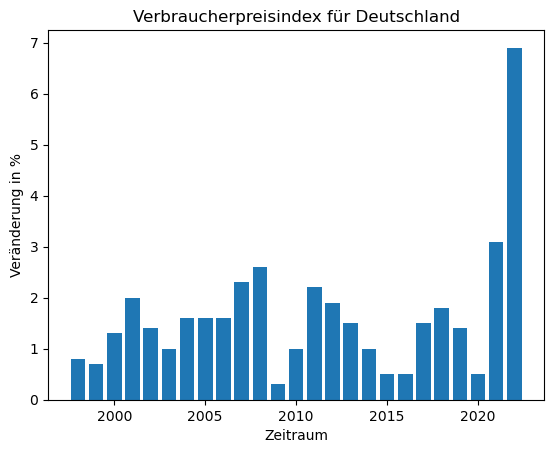

In [7]:
# Create a bar chart using the 'Zeit' and 'PREIS1__CH0004' columns
plt.bar(df['Zeit'], df['PREIS1__CH0004'])
plt.title('Verbraucherpreisindex für Deutschland')
plt.xlabel('Zeitraum')
plt.ylabel('Veränderung in %')
plt.show()